# 13. Object Orientation and Graphical User Interfaces

In [1]:
class ExampleOne(object):
    pass

In [2]:
c = ExampleOne()

In [3]:
c.__str__()

'<__main__.ExampleOne object at 0x000002BA22541278>'

In [4]:
type(c)

__main__.ExampleOne

In [5]:
class ExampleTwo(object):
    def __init__(self, a, b):
        self.a = a
        self.b = b

In [6]:
c = ExampleTwo(1, 'text')

In [7]:
c.a

1

In [8]:
c.b

'text'

In [9]:
c = ExampleOne()
c.first_name = 'Jason'
c.last_name = 'Bourne'
c.movies = 4

In [10]:
print('{} {} {}'.format(c.first_name, c.last_name, c.movies))

Jason Bourne 4


In [11]:
class ExampleThree(object):
    def __init__(self, a, b):
        self.a = a
        self.b = b
        
    def addition(self):
        return self.a + self.b

In [12]:
c = ExampleThree(10, 15)
c.addition()

25

In [13]:
c.a +=10
c.addition()

35

In [14]:
class ExampleFour(ExampleTwo):
    def addition(self):
        return self.a + self.b

In [15]:
c = ExampleFour(10,15)
c.addition()

25

In [16]:
class ExampleFive(ExampleFour):
    def multiplication(self):
        return self.a*self.b

In [17]:
c = ExampleFive(10,15)
c.multiplication()

150

In [18]:
def multiplication(self):
    return self.a * self.b

In [19]:
class ExampleSix(ExampleFour):
    multiplication = multiplication

In [20]:
c =ExampleSix(10,15)
c.multiplication()

150

In [21]:
class ExampleSeven(object):
    def __init__(self, a, b):
        self.a = a
        self.b = b
        self.__sum = a + b
        
    multiplication = multiplication
    
    def addition(self):
        return self.__sum

In [22]:
c = ExampleSeven(10,15)
c.addition()

25

In [23]:
c._ExampleSeven__sum

25

In [24]:
c.a += 10

In [25]:
c._ExampleSeven__sum
# the private attribute is not updated!

25

In [26]:
c.multiplication()

300

In [27]:
name_list = ['Sandra','Lilly','Guido', 'Zorro','Harry']

In [28]:
class sorted_list(object):
    def __init__(self, elements):
        self.elements = sorted(elements) #sorted list object
        
    def __iter__(self):
        self.position = -1
        return self
    
    def __next__(self):
        if self.position == len(self.elements) - 1:
            raise StopIteration
        self.position += 1
        return self.elements[self.position]

In [29]:
sorted_name_list = sorted_list(name_list)

In [30]:
for name in sorted_name_list:
    print(name)

Guido
Harry
Lilly
Sandra
Zorro


In [31]:
type(sorted_name_list)

__main__.sorted_list

## Simple Short Rate Class

In [32]:
import numpy as np

In [33]:
def discount_factor(r, t): 
    ''' Function to calculate a discount factor.
    Parameters = = = = = = = = = = 
    r : float positive, constant short rate 
    t : float, array of floats 
        future date(s), in fraction of years; e.g. 0.5 means half a year from now 
    
    Returns = = = = = = = \
    df : float discount factor ''' 
    
    df = np.exp(-r * t) 
    # use of NumPy universal function for vectorization return df
    
    return df

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

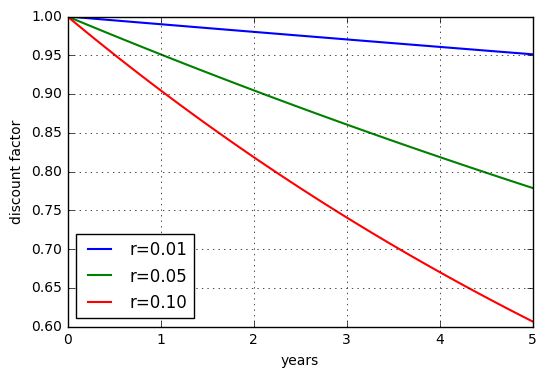

In [35]:
t = np.linspace(0, 5)
for r in [0.01, 0.05, 0.1]:
    plt.plot(t, discount_factor(r,t), label='r={:4.2f}'.format(r), lw=1.5)
plt.xlabel('years')
plt.ylabel('discount factor')
plt.grid(True)
plt.legend(loc=0)

In [36]:
class short_rate(object):
    ''' Class to model a constant short rate object. 
    Parameters = = = = = = = = = = 
    name : string name of the object 
    rate : float positive, constant short rate 
    
    Methods = = = = = = = 
    get_discount_factors : returns discount factors for given list/ array of dates/ times (as year fractions) ''' 
    
    def __init__(self, name, rate): 
        self.name = name 
        self.rate = rate
        
    def get_discount_factors(self, time_list):
        '''time_list : list/array-like'''
        time_list = np.array(time_list)
        return np.exp(-self.rate*time_list)

In [37]:
sr = short_rate('r', 0.05)

In [38]:
sr.name, sr.rate

('r', 0.05)

In [39]:
time_list = [0.0, 0.5, 1.0, 1.25, 1.75, 2.0] #in year fractions

In [40]:
sr.get_discount_factors(time_list)

array([ 1.        ,  0.97530991,  0.95122942,  0.93941306,  0.91621887,
        0.90483742])

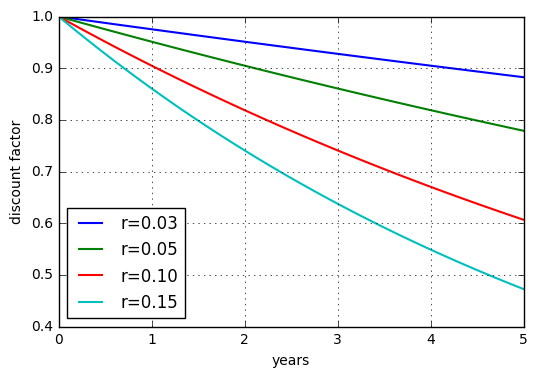

In [41]:
for r in [0.025, 0.05, 0.1, 0.15]:
    sr.rate = r
    plt.plot(t, sr.get_discount_factors(t),
            label='r={:4.2f}'.format(r), lw=1.5)
plt.xlabel('years')
plt.ylabel('discount factor')
plt.grid(True)
plt.legend(loc=0)

### Investment Example

In [42]:
sr.rate = 0.05
cash_flows = np.array([-100, 50, 75])
time_list = [0.0,1.0,2.0]

In [43]:
disc_facts = sr.get_discount_factors(time_list)
pv = disc_facts * cash_flows

In [44]:
pv

array([-100.        ,   47.56147123,   67.86280635])

In [45]:
npv = pv.sum()
npv

15.424277577732667

In [46]:
sr.rate = 0.15
np.sum(sr.get_discount_factors(time_list)*cash_flows)

-1.4032346276182679

## Cash Flow Series Class

In [47]:
class cash_flow_series(object):
    ''' Class to model a cash flow series. 
    Attributes = = = = = = = = = = 
    name : string name of the object 
    time_list : list/ array-like list of (positive) year fractions
    cash_flows: list/array-like corresponding list of cash flow values 
    short_rate : instance of short_rate class short rate object used for discounting 
    
    Methods = = = = = = = 
    present_value_list : returns an array with present values 
    net_present_value : returns NPV for cash flow series 
    '''
    
    def __init__(self, name, time_list, cash_flows, short_rate):
        self.name = name
        self.time_list = time_list
        self.cash_flows = cash_flows
        self.short_rate = short_rate
        
    def present_value_list(self):
        df = self.short_rate.get_discount_factors(self.time_list)
        return np.array(self.cash_flows)*df
    
    def net_present_value(self):
        return np.sum(self.present_value_list())

In [48]:
sr.rate = 0.05
cfs = cash_flow_series('cvs', time_list, cash_flows, sr)

In [49]:
cfs.cash_flows

array([-100,   50,   75])

In [50]:
cfs.time_list

[0.0, 1.0, 2.0]

In [51]:
cfs.present_value_list()

array([-100.        ,   47.56147123,   67.86280635])

In [52]:
cfs.net_present_value()

15.424277577732667

In [53]:
class cfs_sensitivity(cash_flow_series):
    def npv_sensitivity(self, short_rates):
        npvs = []
        for rate in short_rates:
            sr.rate = rate
            npvs.append(self.net_present_value())
        return np.array(npvs)

In [54]:
cfs_sens = cfs_sensitivity('cfs', time_list, cash_flows, sr)

In [55]:
short_rates = [0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.2]

In [56]:
npvs = cfs_sens.npv_sensitivity(short_rates)

In [57]:
npvs

array([ 23.01739219,  20.10770244,  15.42427758,  10.94027255,
         6.64667738,   2.53490386,  -1.40323463,  -8.78945889])

(0, 0.2)

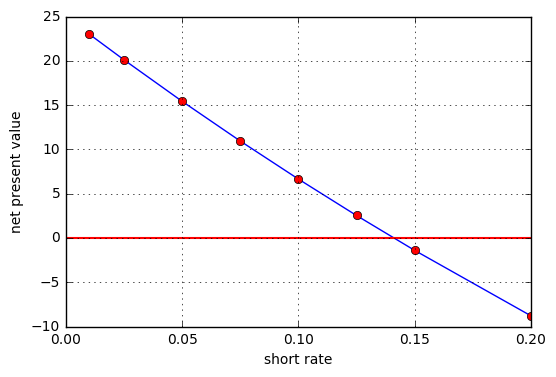

In [64]:
plt.plot(short_rates, npvs, 'b')
plt.plot(short_rates, npvs, 'ro')
plt.plot((0, max(short_rates)), (0,0), 'r', lw=1.5)
plt.grid(True)
plt.xlabel('short rate')
plt.ylabel('net present value')
plt.xlim((0, max(short_rates)))

## Graphical User Interfaces